### Import Essential Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_sdn.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Preprocessing

#### Dataset Dimensions

In [4]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

#### Descriptive statistics of dataset

In [8]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### Count of null values in each feature 

In [6]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [7]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

#### Drop rows with null values

In [8]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [9]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [14]:
DDOS = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(DDOS)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

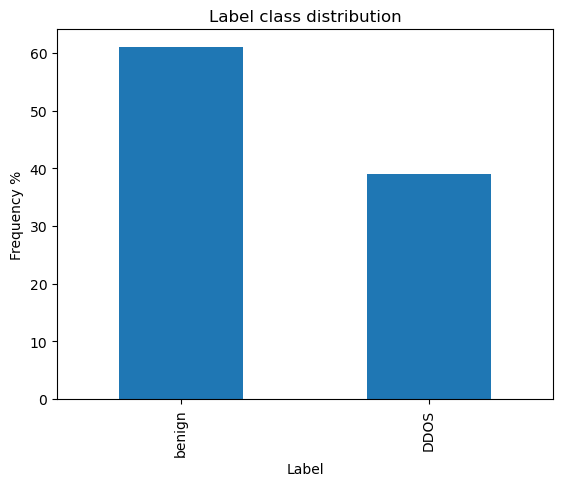

In [15]:
# Let's plot the Label class against the Frequency
labels = ['benign','DDOS']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

C:\Users\hp\anaconda3\envs\ml_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


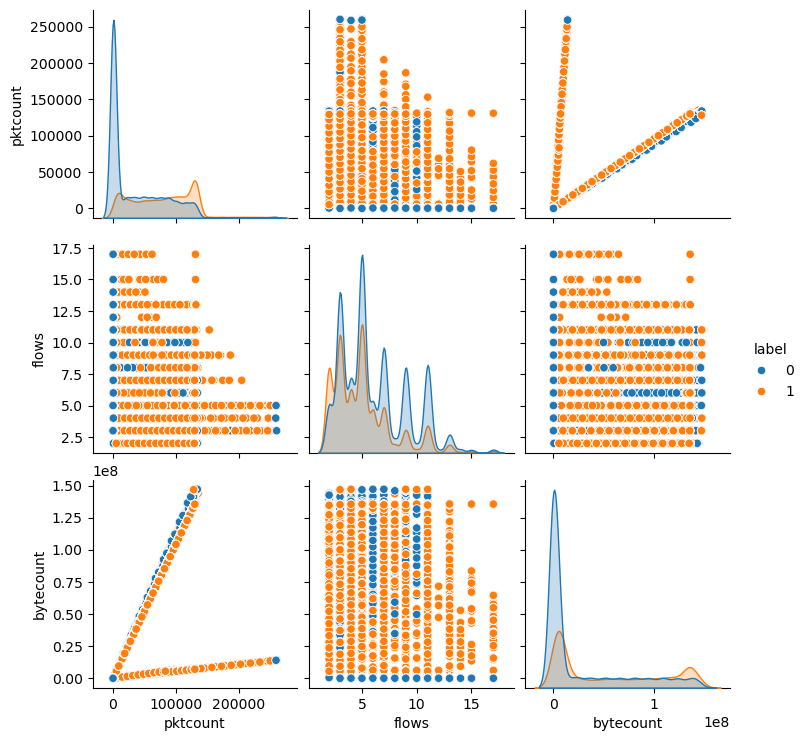

In [16]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [17]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [18]:
print(df.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [21]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [22]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [23]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition 

In [25]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 2000x2000 with 0 Axes>

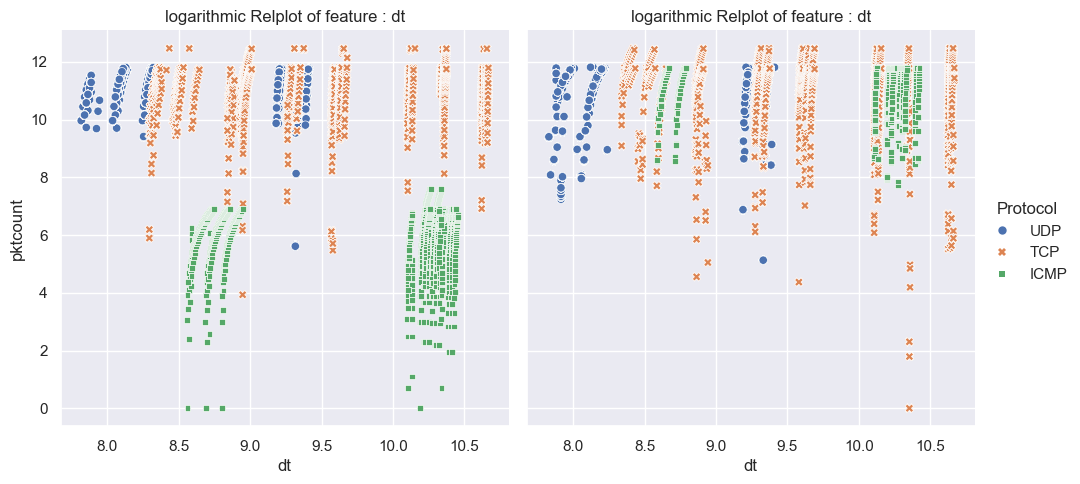

<Figure size 2000x2000 with 0 Axes>

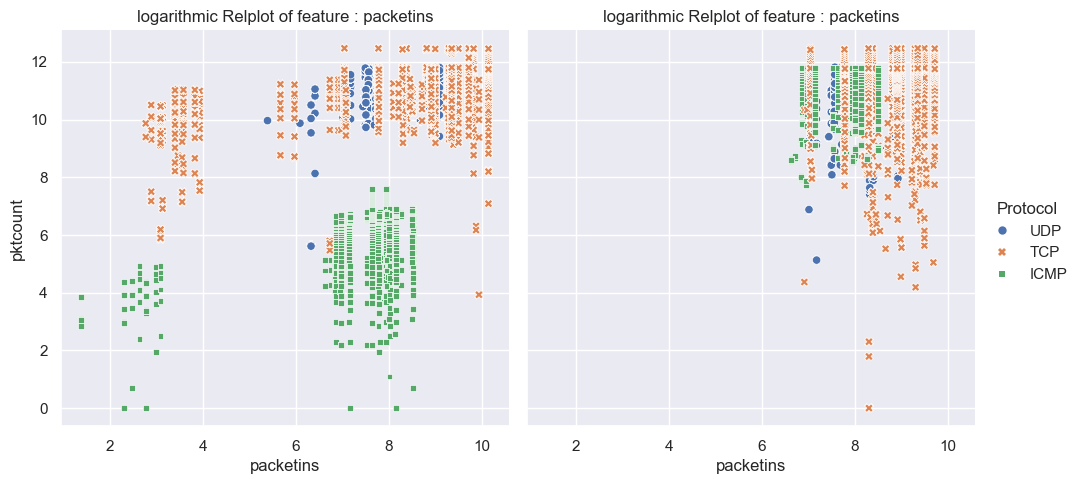

<Figure size 2000x2000 with 0 Axes>

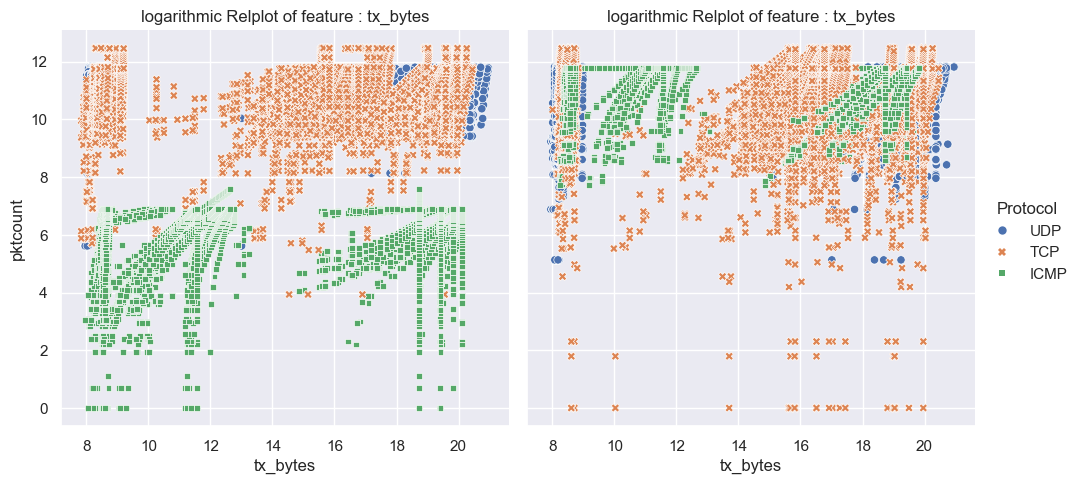

<Figure size 2000x2000 with 0 Axes>

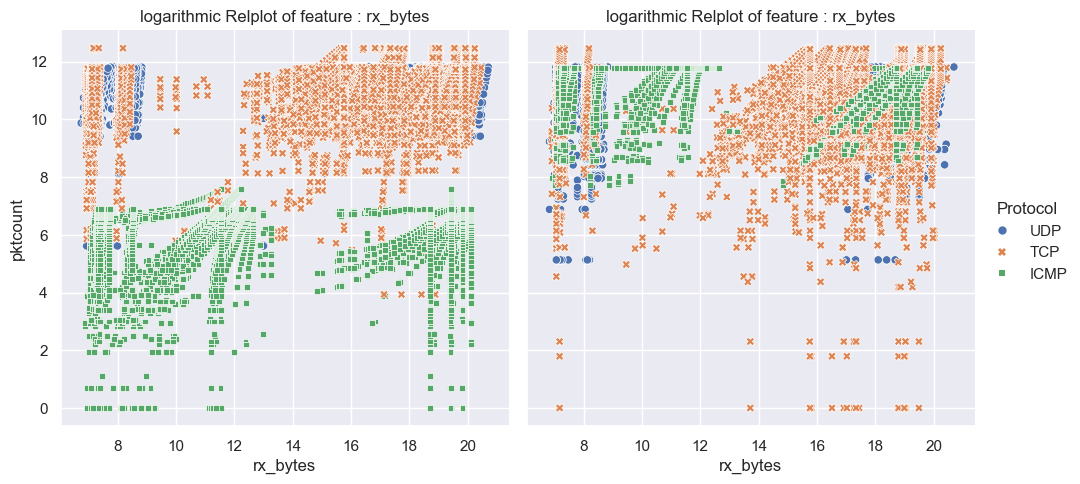

In [29]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

In [31]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

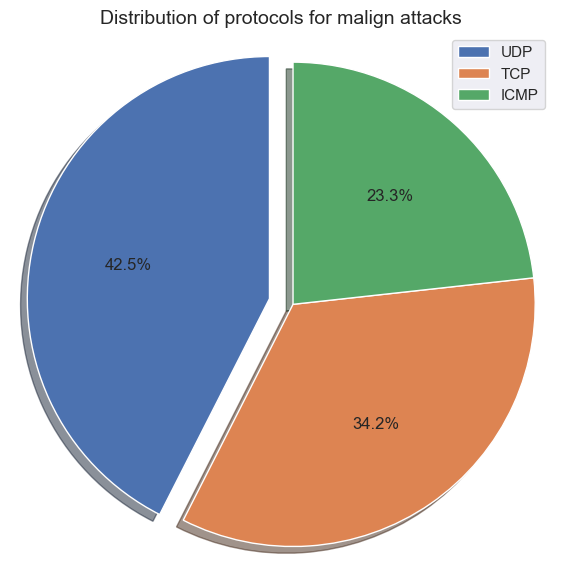

In [32]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

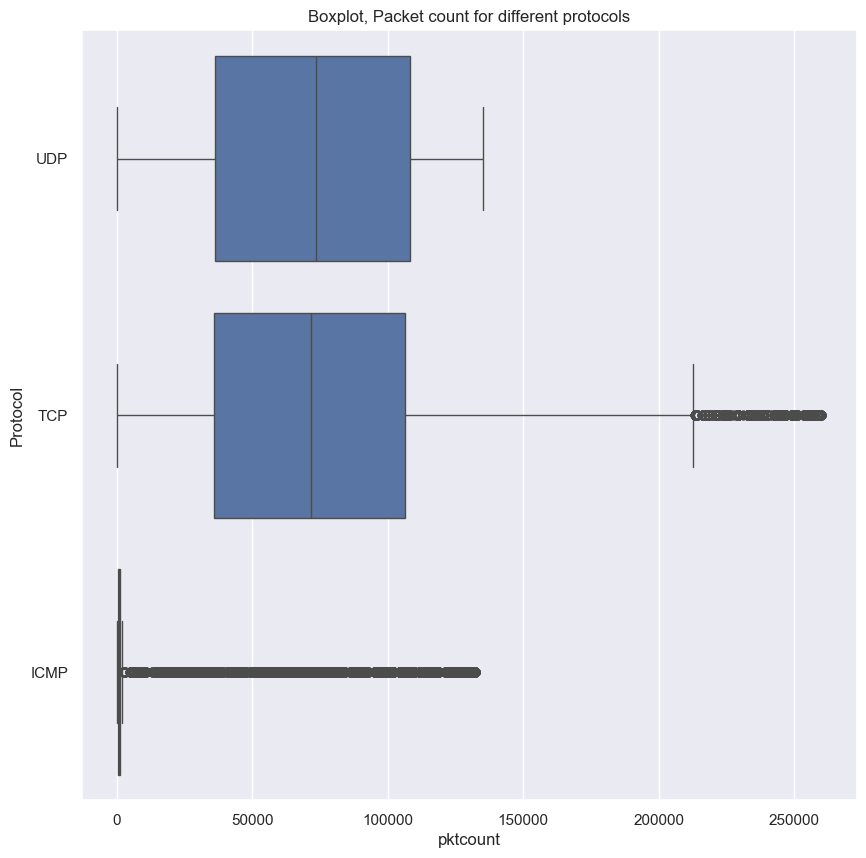

In [33]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

Heat map of correlation of features

In [34]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [35]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [36]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


In [37]:
df.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10       bool
src_10.0.0.11       bool
src_10.0.0.12       bool
src_10.0.0.13       bool
src_10.0.0.14       bool
src_10.0.0.15       bool
src_10.0.0.16       bool
src_10.0.0.17       bool
src_10.0.0.18       bool
src_10.0.0.2        bool
src_10.0.0.20       bool
src_10.0.0.3        bool
src_10.0.0.4        bool
src_10.0.0.5        bool
src_10.0.0.6        bool
src_10.0.0.7        bool
src_10.0.0.8        bool
src_10.0.0.9        bool
dst_10.0.0.10       bool
dst_10.0.0.11       bool


### Split into Independent and dependent variables

In [38]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [39]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 56) (31152, 56)


## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [41]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [42]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Model fitting 

In [43]:
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

Epoch 1/100
2272/2272 - 8s - loss: 0.1564 - accuracy: 0.9341 - val_loss: 0.1014 - val_accuracy: 0.9573 - 8s/epoch - 4ms/step
Epoch 2/100
2272/2272 - 7s - loss: 0.0864 - accuracy: 0.9659 - val_loss: 0.0742 - val_accuracy: 0.9705 - 7s/epoch - 3ms/step
Epoch 3/100
2272/2272 - 6s - loss: 0.0713 - accuracy: 0.9717 - val_loss: 0.1123 - val_accuracy: 0.9613 - 6s/epoch - 3ms/step
Epoch 4/100
2272/2272 - 6s - loss: 0.0638 - accuracy: 0.9752 - val_loss: 0.0589 - val_accuracy: 0.9765 - 6s/epoch - 3ms/step
Epoch 5/100
2272/2272 - 6s - loss: 0.0557 - accuracy: 0.9780 - val_loss: 0.0530 - val_accuracy: 0.9792 - 6s/epoch - 3ms/step
Epoch 6/100
2272/2272 - 6s - loss: 0.0509 - accuracy: 0.9801 - val_loss: 0.0424 - val_accuracy: 0.9839 - 6s/epoch - 3ms/step
Epoch 7/100
2272/2272 - 6s - loss: 0.0455 - accuracy: 0.9817 - val_loss: 0.0535 - val_accuracy: 0.9780 - 6s/epoch - 3ms/step
Epoch 8/100
2272/2272 - 6s - loss: 0.0470 - accuracy: 0.9817 - val_loss: 0.0583 - val_accuracy: 0.9770 - 6s/epoch - 3ms/step


## Plotting Loss v/s Epochs 

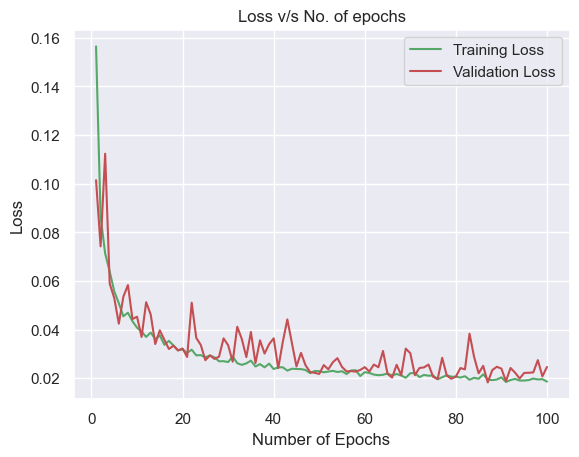

In [44]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs 

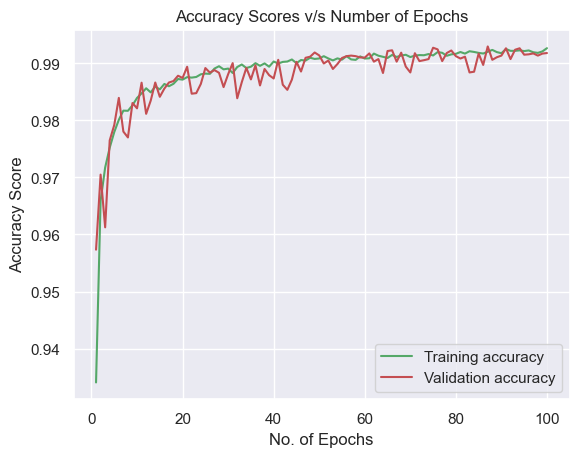

In [45]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation 

In [46]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 [==============================] - 2s 2ms/step - loss: 0.0246 - accuracy: 0.9918
Accuracy of Deep neural Network : 99.18


#### K-Nearest Neighbor Classifier

In [47]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of KNN Classifier : 96.52
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     19010
        DDOS       0.97      0.94      0.95     12142

    accuracy                           0.97     31152
   macro avg       0.97      0.96      0.96     31152
weighted avg       0.97      0.97      0.97     31152

Confusion Matrix:

True Negative (TN): 18619
False Positive (FP): 391
False Negative (FN): 693
True Positive (TP): 11449


#### SVM Classifier

In [48]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of SVM Classifier : 97.34
              precision    recall  f1-score   support

      benign       0.98      0.98      0.98     19010
        DDOS       0.97      0.97      0.97     12142

    accuracy                           0.97     31152
   macro avg       0.97      0.97      0.97     31152
weighted avg       0.97      0.97      0.97     31152

Confusion Matrix:

True Negative (TN): 18598
False Positive (FP): 412
False Negative (FN): 418
True Positive (TP): 11724


#### Decision Tree Classifier

In [49]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of Decision Tree Classifier : 96.46
              precision    recall  f1-score   support

      benign       0.98      0.96      0.97     19010
        DDOS       0.94      0.97      0.96     12142

    accuracy                           0.96     31152
   macro avg       0.96      0.97      0.96     31152
weighted avg       0.97      0.96      0.96     31152

Confusion Matrix:

True Negative (TN): 18239
False Positive (FP): 771
False Negative (FN): 332
True Positive (TP): 11810


In [50]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of Naive Bayes Classifier : 71.49
              precision    recall  f1-score   support

      benign       0.75      0.81      0.78     19010
        DDOS       0.65      0.57      0.61     12142

    accuracy                           0.71     31152
   macro avg       0.70      0.69      0.69     31152
weighted avg       0.71      0.71      0.71     31152

Confusion Matrix:

True Negative (TN): 15316
False Positive (FP): 3694
False Negative (FN): 5187
True Positive (TP): 6955


In [51]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of QDA Classifier : 55.46
              precision    recall  f1-score   support

      benign       0.88      0.31      0.46     19010
        DDOS       0.46      0.94      0.62     12142

    accuracy                           0.55     31152
   macro avg       0.67      0.62      0.54     31152
weighted avg       0.72      0.55      0.52     31152

Confusion Matrix:

True Negative (TN): 5913
False Positive (FP): 13097
False Negative (FN): 778
True Positive (TP): 11364


In [52]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of SGD Classifier : 84.28
              precision    recall  f1-score   support

      benign       0.85      0.91      0.88     19010
        DDOS       0.84      0.74      0.79     12142

    accuracy                           0.84     31152
   macro avg       0.84      0.82      0.83     31152
weighted avg       0.84      0.84      0.84     31152

Confusion Matrix:

True Negative (TN): 17264
False Positive (FP): 1746
False Negative (FN): 3151
True Positive (TP): 8991


#### Logistic Regression 

In [53]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

print(classification_report(y_test, y_pred, target_names = labels))

confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of Logistic Regression Classifier : 83.83
              precision    recall  f1-score   support

      benign       0.85      0.89      0.87     19010
        DDOS       0.82      0.75      0.78     12142

    accuracy                           0.84     31152
   macro avg       0.83      0.82      0.83     31152
weighted avg       0.84      0.84      0.84     31152

Confusion Matrix:

True Negative (TN): 16955
False Positive (FP): 2055
False Negative (FN): 2983
True Positive (TP): 9159


#### XGBoost Classifier

In [54]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))
print(classification_report(y_test, y_pred, target_names = labels))


confusion_mtx = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_mtx.ravel()
print("Confusion Matrix:\n")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

Accuracy of XGBoost Classifier : 98.13
              precision    recall  f1-score   support

      benign       1.00      0.97      0.98     19010
        DDOS       0.96      1.00      0.98     12142

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

Confusion Matrix:

True Negative (TN): 18474
False Positive (FP): 536
False Negative (FN): 47
True Positive (TP): 12095


### Comparitive analysis of models

In [55]:
Classifier_names = ["DNN", "KNN", "RBF_SVM", "Decision Tree","Naive Bayes","Quadratic","SGD","Logistic Regression","XGBoost"]

In [56]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
0,DNN,99.181432
8,XGBoost,98.128531
2,RBF_SVM,97.335645
1,KNN,96.520288
3,Decision Tree,96.459296
6,SGD,84.280303
7,Logistic Regression,83.827684
4,Naive Bayes,71.491397
5,Quadratic,55.460324


#### Visualize accuracies of the models

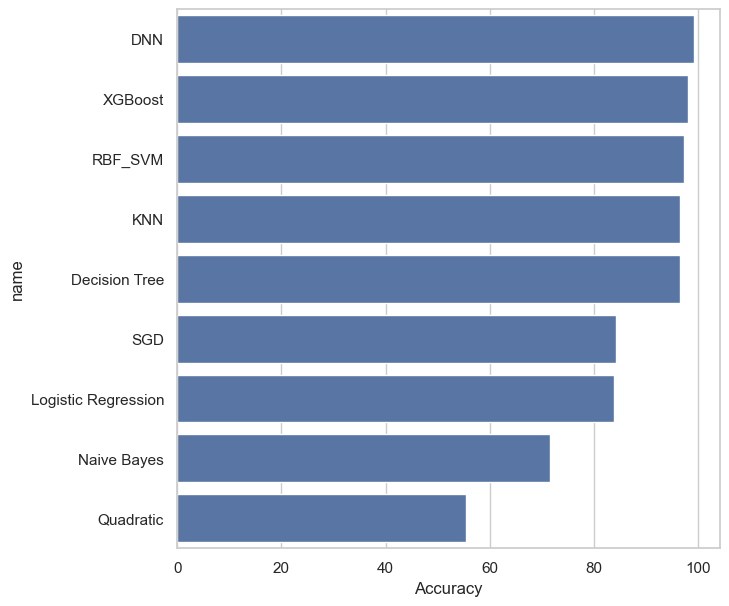

In [57]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [58]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN with an accuracy of 99.18143153190613.


## Making Sample Predictions 

In [59]:
classes = model.predict(X_test)
print(classes)

974/974 [==============================] - 2s 1ms/step
[[4.5292196e-26]
 [0.0000000e+00]
 [1.0000000e+00]
 ...
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]]


In [60]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
y_pred[:20]

[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [62]:
y_test[:20]

2541      0
48775     0
5980      1
5325      1
89914     0
42920     0
102874    0
76266     1
62369     1
22271     1
76512     1
11706     1
7638      0
20337     1
13833     0
86858     0
12674     1
102891    0
925       1
39359     0
Name: label, dtype: int64

## Classification Report 

In [63]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      0.99      0.99     19010
        DDOS       0.98      1.00      0.99     12142

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152



## Plotting Confusion Matrix

In [64]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

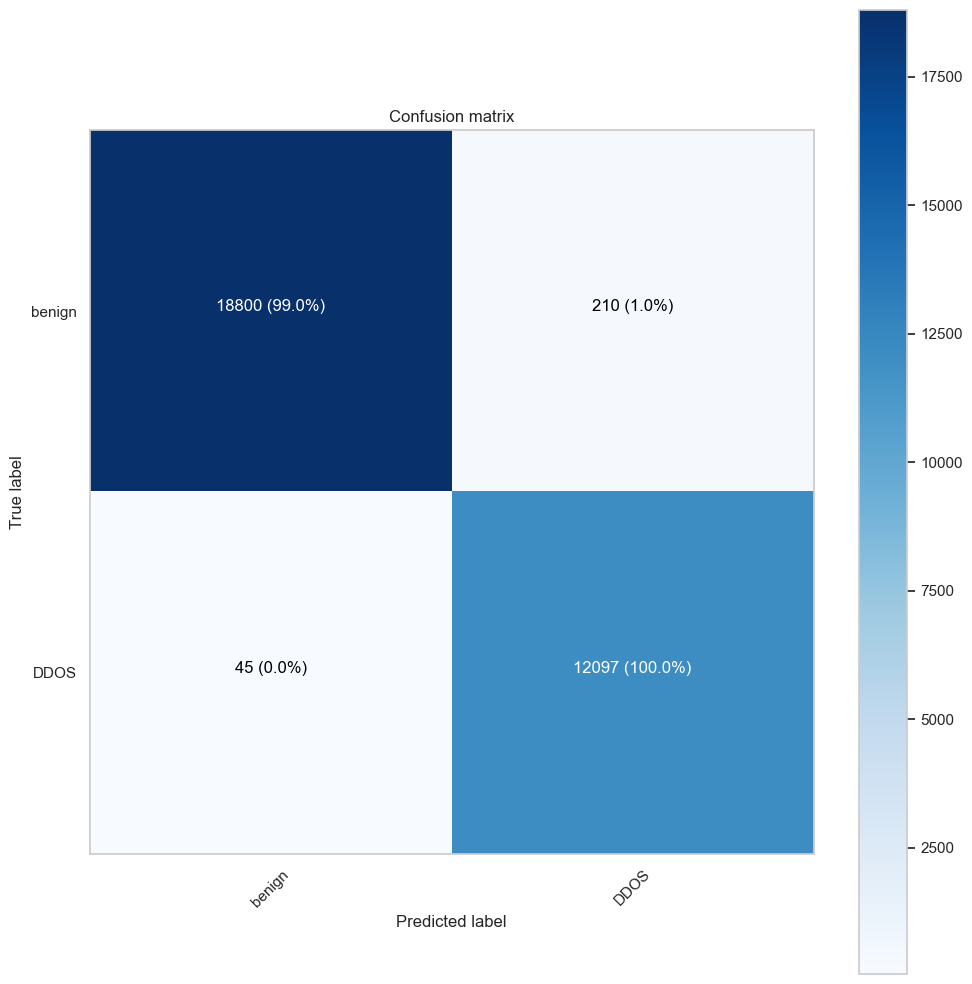

In [65]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

## Displaying ROC-AUC curve

In [66]:
def model_builder_crv(X_train, X_test, y_train, y_test):
    model = keras.Sequential()
    
    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    history = model.fit(X_train,y_train,epochs=100,verbose=0,callbacks=None,validation_data=(X_test,y_test))

    return history, model.layers, model

Area under the curve(AUC) is: 0.9997773194300549


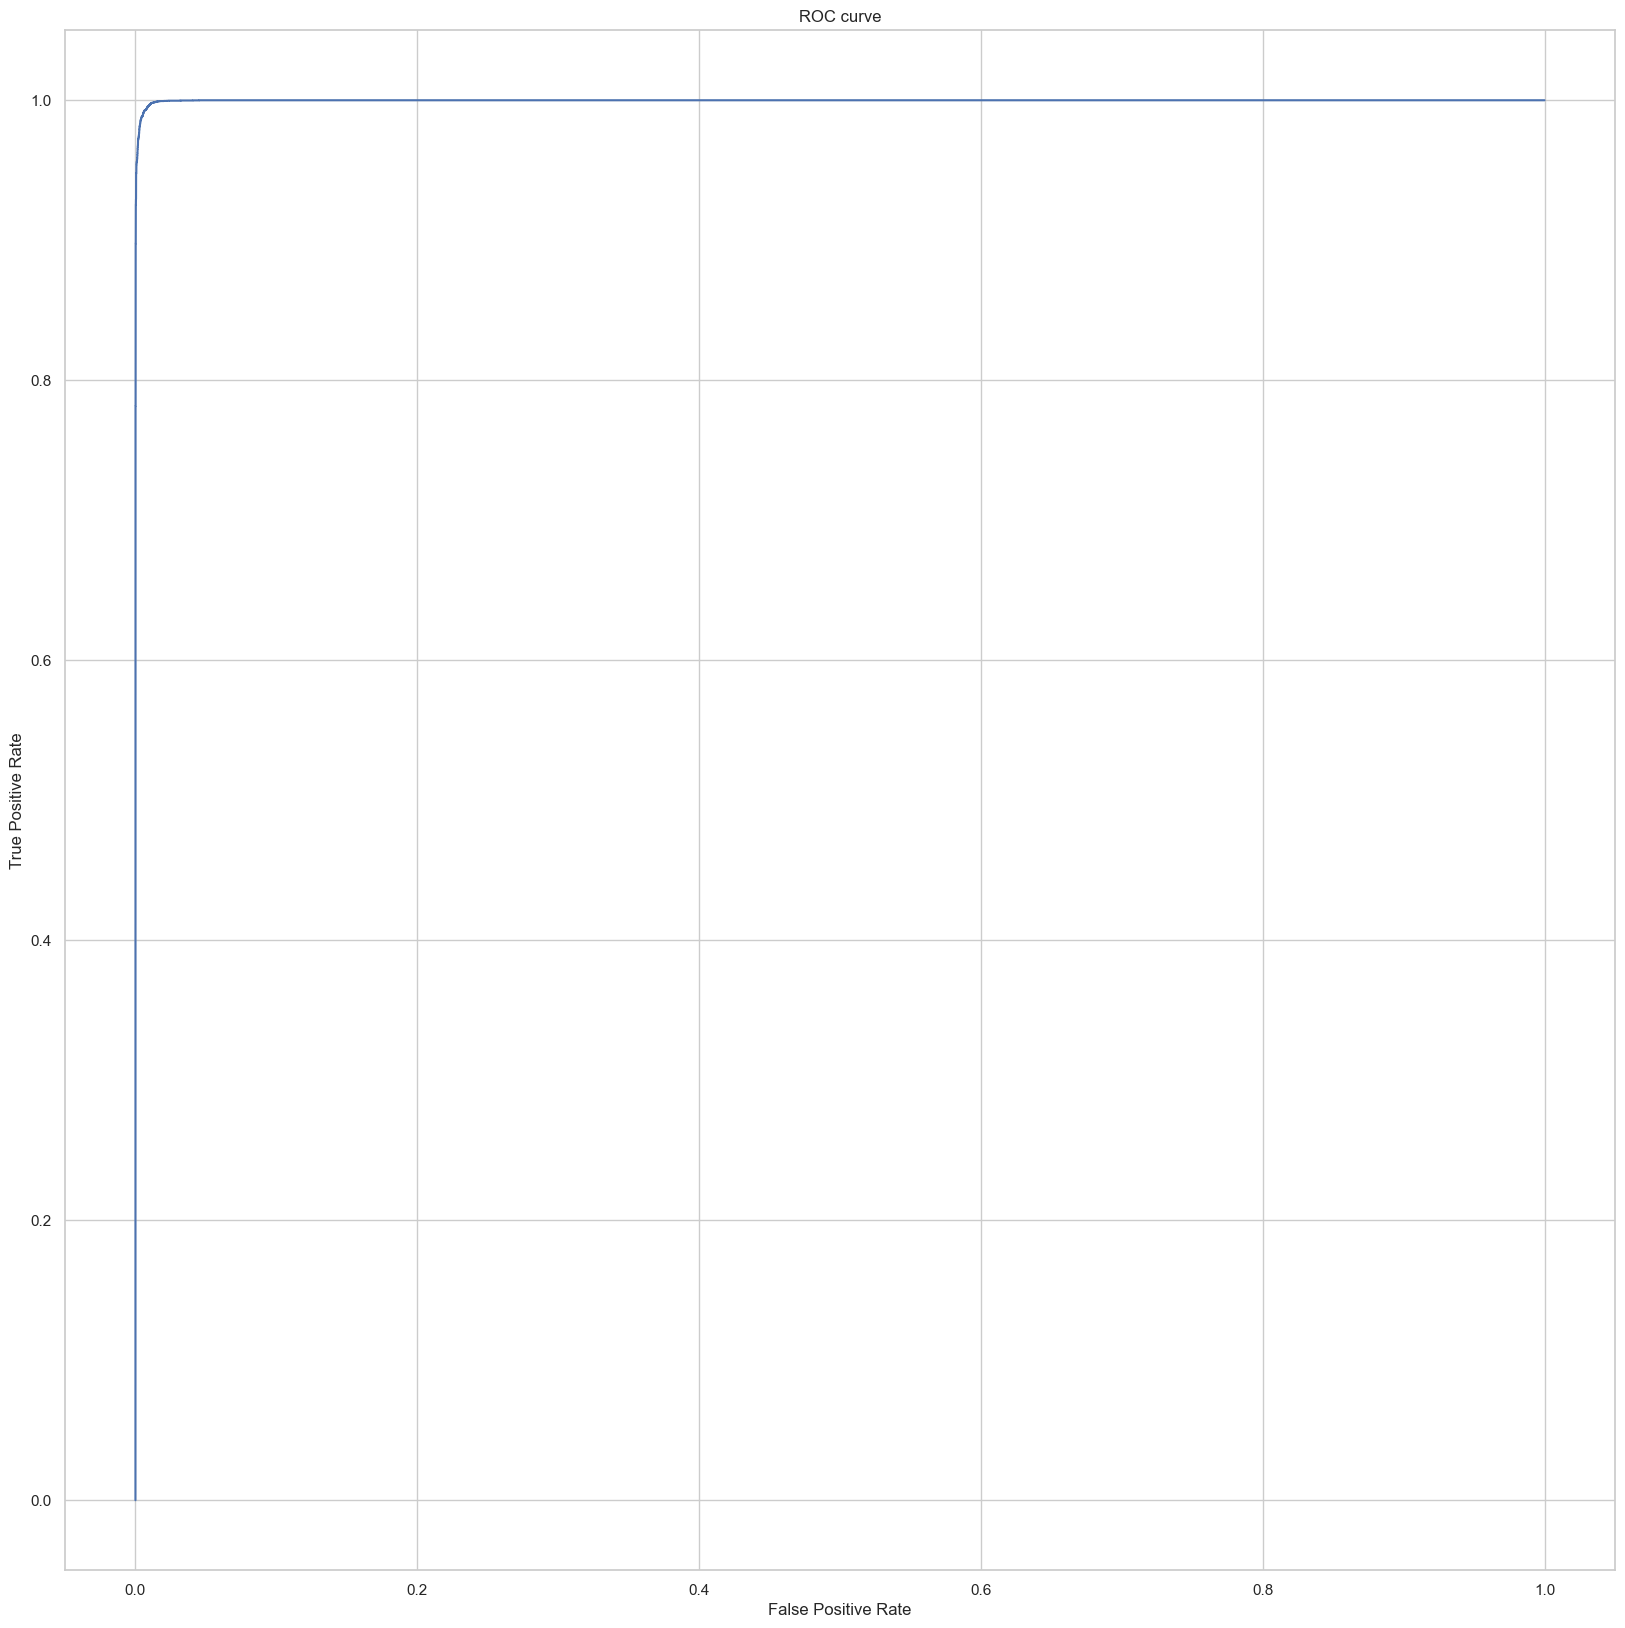

In [67]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20,20))
history,model_layers,model = model_builder_crv(X_train, X_test, y_train, y_test)    
y_predicted = model(X_test)
fpr, tpr, keras_thr = roc_curve(y_test, y_predicted)
auc_crv = auc(fpr, tpr)
print(f"Area under the curve(AUC) is: {auc_crv}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.show()

In [ ]:
# Separate the data by labels
# label_1_data = data[data['label'] == 1]  # Replace 'label' with your actual label column name
# label_0_data = data[data['label'] == 0]

# # Calculate the number of logs to sample
# total_logs = 2750
# label_1_count = int(0.37 * total_logs)  # 1018 logs
# label_0_count = total_logs - label_1_count  # 1732 logs

# # Randomly sample the logs
# sampled_label_1 = label_1_data.sample(n=label_1_count, random_state=42)  # Use random_state for reproducibility
# sampled_label_0 = label_0_data.sample(n=label_0_count, random_state=42)

# # Combine the sampled logs into a new dataset
# subset_data = pd.concat([sampled_label_1, sampled_label_0])

# # Remove the sampled logs from the original dataset
# data = data.drop(sampled_label_1.index).drop(sampled_label_0.index)

# # Save the subset dataset (optional)
# subset_data.to_csv('subset_data.csv', index=False)

# # Save the updated original dataset (optional)
# data.to_csv('updated_dataset.csv', index=False)

# # Print the shape of the subset and updated dataset
# print("Subset dataset shape:", subset_data.shape)
# print("Updated dataset shape:", data.shape)